<a href="https://colab.research.google.com/github/aastha12/dphi-machine-learning-bootcamp/blob/main/Aastha_Jha_XAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

## Import Libraries

In [ ]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
train_df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [ ]:
"""
Using sweetviz which is an automatic EDA library to analyse the dataset first.
I will also look at correlation, histogram, missing values, etc. later on.
"""
!pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(train_df)
#display the report
advert_report.show_html('Heart_Disease.html')


Report Heart_Disease.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
train_df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [ ]:
train_df.isnull().sum() #no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
train_df.skew() #chol, fbs, oldpeak and ca columns have skewness. we will confirm with histograms

age        -0.268034
sex        -0.820789
cp          0.535785
trestbps    0.571733
chol        1.302705
fbs         1.817011
restecg     0.141633
thalach    -0.474609
exang       0.727326
oldpeak     1.249342
slope      -0.588684
ca          1.224102
thal       -0.634908
target     -0.171644
dtype: float64

In [ ]:
train_df.dtypes #checking data type of columns. All are numerical columns

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
train_df.shape #training set has 212 rows and 14 features

(212, 14)

In [ ]:
train_df['target'].value_counts(normalize=True) #somewhat balanced dataset

1    0.542453
0    0.457547
Name: target, dtype: float64

In [ ]:
"""
Positive correlation of target with - chest pain and max heart rate achieved
Negative correlation of target with - exercise induced angina and old peak
"""
train_df.corr()['target'].sort_values() 

exang      -0.482622
oldpeak    -0.398818
ca         -0.365253
thal       -0.291939
sex        -0.249428
age        -0.201492
trestbps   -0.114081
chol       -0.086962
fbs        -0.050644
restecg     0.200817
slope       0.370050
thalach     0.417547
cp          0.477865
target      1.000000
Name: target, dtype: float64

In [ ]:
index = 0

fig = make_subplots(rows=7,cols=2,subplot_titles=(train_df.columns))

for i in range(1,8):
  for j in range(1,3):
    plot_df = train_df[train_df.columns[index]]
    trace = go.Histogram(x=plot_df)
    fig.append_trace(trace,i,j)
    index+=1

fig.update_layout(height=900,width=1250,title_text='Distribution of Numerical Attributes')
fig.show()

In [ ]:
index = 0

fig = make_subplots(rows=7,cols=2,subplot_titles=(train_df.columns))

for i in range(1,8):
  for j in range(1,3):
    plot_df = train_df[train_df.columns[index]]
    trace = go.Box(x=plot_df)
    fig.append_trace(trace,i,j)
    index+=1

fig.update_layout(height=900,width=1250,title_text='Boxplot of Numerical Attributes')
fig.show()

From the histogram and boxplots, we can see that some of the features are skewed and some contain outliers like trestbps, oldpeak, ca, and thalach. We can also see that all the features are at a different scale which means we need to perform scaling before modeling

## Separate the Input and Target Features of the data

In [ ]:
X = train_df.copy()
X.drop(['target'],axis=1,inplace=True)
y=train_df['target']

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
print("Shape of training features:",X_train.shape)
print("Shape of training labels:",y_train.shape)
print("Shape of testing features:",X_test.shape)
print("Shape of testing labels:",y_test.shape)

Shape of training features: (169, 13)
Shape of training labels: (169,)
Shape of testing features: (43, 13)
Shape of testing labels: (43,)


## Scale your data if required

In [ ]:

ss=StandardScaler()

X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

# Task 2

## Build a Logistic Regression Model on train set

In [ ]:
LR=LogisticRegression(random_state=0)

LR.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [ ]:
predictions=LR.predict(X_test_scaled)

f1_score(y_test,predictions)

0.8399999999999999

In [ ]:
# would be better to evalute on 5 fold cross validation set to get a better estimate of F1 score

print("5 fold cross validation score on scaled test set:",cross_val_score(LR,X_test_scaled,y_test,cv=5,scoring='f1').mean())
print("5 fold cross validation score on scaled train set:",cross_val_score(LR,X_train_scaled,y_train,cv=5,scoring='f1').mean())

5 fold cross validation score on scaled test set: 0.9044444444444444
5 fold cross validation score on scaled train set: 0.8412299465240641


# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [ ]:
!pip install shap

In [ ]:
import shap

explainer=shap.LinearExplainer(LR,X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [ ]:
pd.DataFrame(shap_values,columns=X_test.columns).head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.086223,-0.279619,1.159063,-0.240417,-0.034219,-0.055162,-0.673186,0.473878,0.570792,0.372988,0.318451,0.317311,0.357128
1,-0.023755,0.622378,1.159063,0.037522,-0.030002,0.005456,-0.673186,-1.113122,0.570792,0.372988,0.318451,0.317311,3.002523
2,0.020236,0.622378,0.159871,-0.055124,0.076274,0.005456,0.412598,0.505618,0.570792,-0.254762,0.318451,0.317311,0.357128
3,-0.287704,-0.279619,0.159871,0.454429,-0.013976,0.005456,0.412598,0.092998,0.570792,0.372988,0.318451,0.317311,0.357128
4,0.218197,-0.279619,2.158256,-0.935263,-0.020724,0.005456,-0.673186,0.156478,0.570792,0.059113,-0.359105,0.317311,-0.965569


In [ ]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: 0.29774443189441074


## Write your inferences from the generated plot.

SHAP values of all features in a single row sum up to explain why the prediction was different from the baseline value or expected value (which in our case is 0.29774443189441074)

This difference helps us in explaining why the model is inclined on predicting a specific class outcome.

The expected value (0.29774443189441074) is used as the base value. The values above this base value will be put into class 1 (Heart disease present) wheras the values below it will be put into class 0 (Heart disease is not present).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
y_test.values[0]

1

In [ ]:
"""
since we scaled our test and train set, we need to inverse transform it to get the values back
to original scale
"""
transformed_test_df=pd.DataFrame(ss.inverse_transform(X_test_scaled),columns=X_test.columns) 

In [ ]:
transformed_test_df.iloc[0,:]

age         5.800000e+01
sex         1.000000e+00
cp          2.000000e+00
trestbps    1.400000e+02
chol        2.110000e+02
fbs         1.000000e+00
restecg     0.000000e+00
thalach     1.650000e+02
exang       0.000000e+00
oldpeak    -1.110223e-16
slope       2.000000e+00
ca         -1.110223e-16
thal        2.000000e+00
Name: 0, dtype: float64

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], transformed_test_df.iloc[0,:])

## Write your inferences from the generated plot.

So the 1st row of y_train actually has heart disease and hence label is 1. From the force plot, we can see it's because the final value (2.67) is higher than the base value and hence the person is classified as 1. 

Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from cp (Chest pain type) being 2 followed by exang being 0. 

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
transformed_test_df=pd.DataFrame(ss.inverse_transform(X_test_scaled),columns=X_test.columns)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, transformed_test_df)

## Write your inferences from the generated plot.

The above Y-axis is the X-axis of the individual force plot. There are 43 data points in our X_test, so the X-axis has 43 observations.

Most of the first 21 samples did not have heart disease and the chest pain type is mostly 0, with "thal" value has normal(3). They also have lower "maximum heart rate achieved". Most of them also had Exercise induced angina and have 1-3 major veseels colored by fluoroscopy ("ca" column).

Most of the remaining samples had heart diease and their "maximum heart rate achieved" was on the higher side. The chest pain type is mostly 2 or 3 and the "thal" is mostly 0,1, or 3. Most of them did not have Exercise induced angina and have 0 major veseels colored by fluoroscopy ("ca" column).

# Task 6

## Plot a SHAP summary plot using all the features in the data

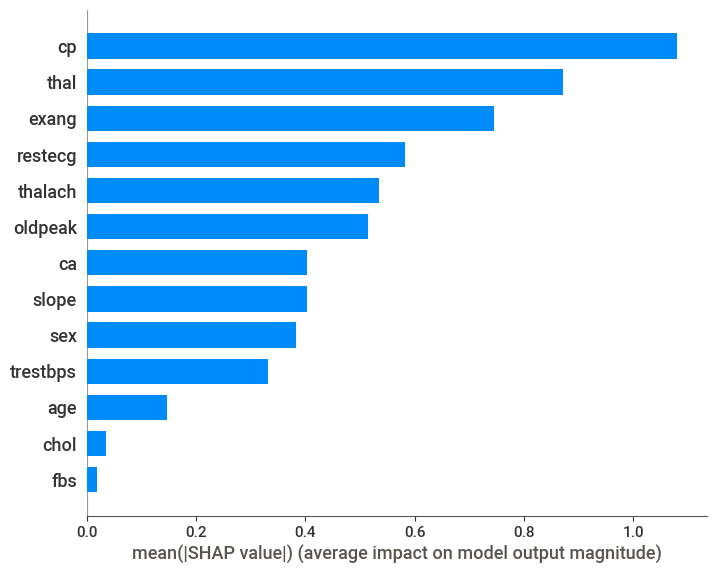

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, transformed_test_df, plot_type="bar")

## Write your inferences from the generated plot.

Chest Pain Type("cp") and "thal" are the top 2 important features while determining the target.

On the other hand, fasting blood sugar and serum cholesterol are the least important features while determining whether a person has heart disease or not.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

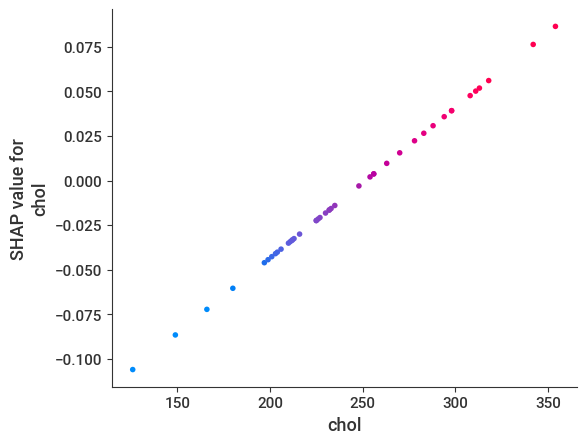

In [ ]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',shap_values=shap_values, features=transformed_test_df)

## Write your inferences from the generated plot.

This is a linear relationship. Higher serum cholesterol levels have higher shap values, pushing the model’s predictions to say that these individuals have a higher chance of getting a heart disease as compared to people with lower serum cholesterol levels. 

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

In [ ]:
transformed_test_df=pd.DataFrame(ss.inverse_transform(X_test_scaled),columns=X_test.columns)

In [ ]:
transformed_test_df['sex'].value_counts()

1.0    30
0.0    13
Name: sex, dtype: int64

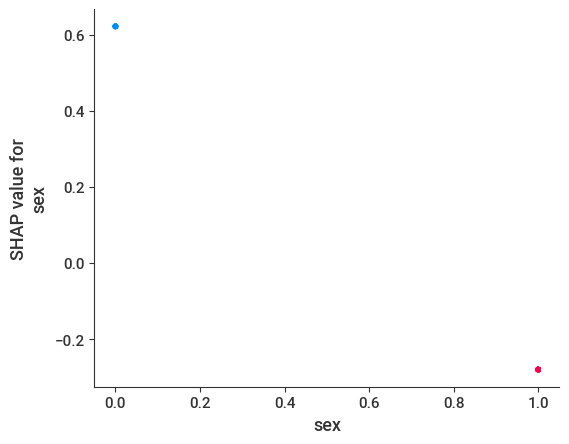

In [ ]:
shap.initjs()
shap.dependence_plot(ind='sex', interaction_index='sex',shap_values=shap_values, features=transformed_test_df)

Males have higher shap values than females which influences the model’s predictions to say that males have a higher chance of getting a heart disease as compared to females.

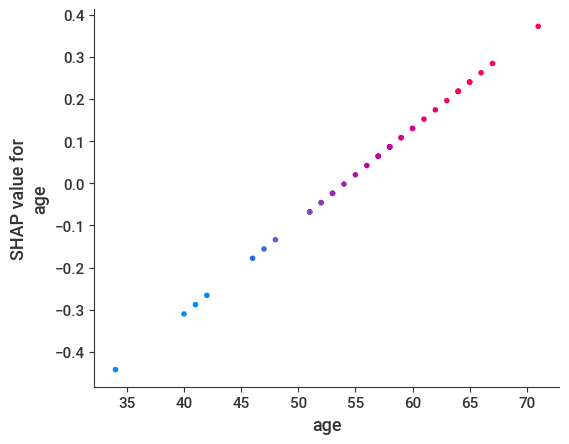

In [ ]:
shap.initjs()
shap.dependence_plot(ind='age', interaction_index='age',shap_values=shap_values, features=transformed_test_df)

Senior citizens (aged 60+) have a higher shap value indicating that these people have a higher chance of getting heart disease

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 